In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [41]:
# View measurement table
measure_data = pd.read_sql("SELECT * FROM measurement", engine)
measure_data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [11]:
# Calculate the date 1 year ago from the last data point in the database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [12]:
# filter for dates in the last year of data
year_filter = session.query(Measurement.date).\
filter(Measurement.date > '2016-08-23').\
group_by(Measurement.date).\
order_by(Measurement.date).all()

# Exploratory Climate Analysis: Precipitation

## Precipitation Analysis: approach 1, groupby measurement date

In [13]:
# query to sum all rainfall by date for the last year
sel = [Measurement.date,
      func.sum(Measurement.prcp)]

precip_totals = session.query(*sel).\
filter(Measurement.date > '2016-08-23').\
group_by(Measurement.date).\
order_by(Measurement.date).all()
precip_totals

[('2016-08-24', 9.329999999999998),
 ('2016-08-25', 0.54),
 ('2016-08-26', 0.09999999999999999),
 ('2016-08-27', 0.31999999999999995),
 ('2016-08-28', 3.0999999999999996),
 ('2016-08-29', 1.46),
 ('2016-08-30', 0.07),
 ('2016-08-31', 3.1799999999999997),
 ('2016-09-01', 0.03),
 ('2016-09-02', 0.25),
 ('2016-09-03', 1.27),
 ('2016-09-04', 1.3800000000000001),
 ('2016-09-05', 0.33999999999999997),
 ('2016-09-06', 1.23),
 ('2016-09-07', 2.0),
 ('2016-09-08', 0.4600000000000001),
 ('2016-09-09', 1.0699999999999998),
 ('2016-09-10', 1.4),
 ('2016-09-11', 1.25),
 ('2016-09-12', 1.54),
 ('2016-09-13', 2.71),
 ('2016-09-14', 14.280000000000001),
 ('2016-09-15', 4.96),
 ('2016-09-16', 0.8200000000000001),
 ('2016-09-17', 0.6799999999999999),
 ('2016-09-18', 0.53),
 ('2016-09-19', 0.32),
 ('2016-09-20', 1.03),
 ('2016-09-21', 1.17),
 ('2016-09-22', 1.44),
 ('2016-09-23', 1.57),
 ('2016-09-24', 0.28),
 ('2016-09-25', 0.09),
 ('2016-09-26', 1.67),
 ('2016-09-27', 1.3599999999999999),
 ('2016-09-28

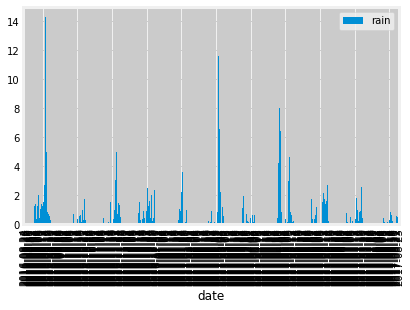

<Figure size 720x864 with 0 Axes>

In [14]:
# Save the query results as a Pandas Data Frame and Plot the Results in a Matplotlib bar chart
precip_totals_df = pd.DataFrame(columns=['date','rain'], data=precip_totals)
precip_totals_df.set_index('date', inplace=True)
precip_totals_df.plot.bar()
#plt.tight_layout()
plt.figure(figsize=(10,12))
plt.show()

In [15]:
# display precip totals data frame header
precip_totals_df.head()

,rain
date,
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
2016-08-28,3.10


In [16]:
# display precip totals column
precip_totals_df.columns

Index(['rain'], dtype='object')

### Summary statistics for approach 1

In [17]:
#Summary statistics of group_by based on Measurement.date - doesn't match the homework example
# they must intend for us NOT to use a groupby
precip_totals_df.describe()

,rain
count,365.000000
mean,0.974164
std,1.776466
min,0.000000
25%,0.050000
50%,0.400000
75%,1.080000
max,14.280000


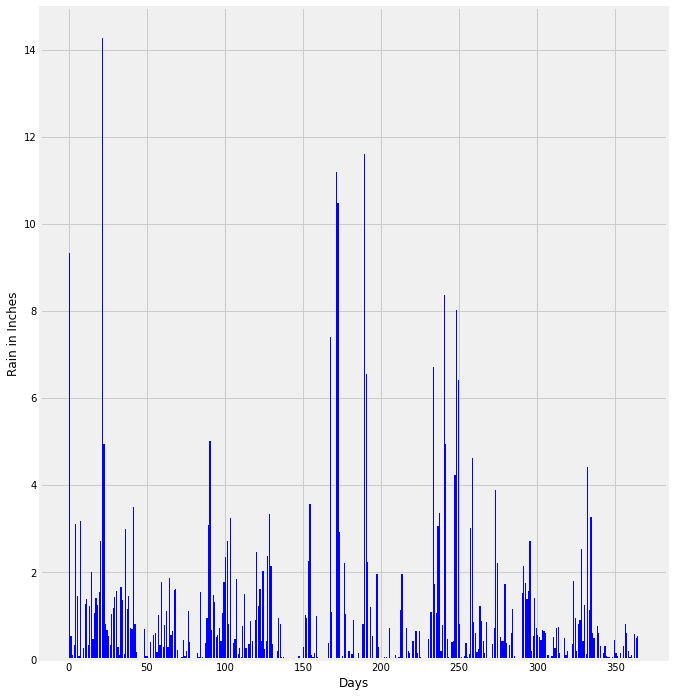

In [18]:
# Plot the Results in a Matplotlib bar chart
plt.figure(figsize=(10,12))
x_axis = np.arange(len(precip_totals_df["rain"]))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, precip_totals_df["rain"], color="blue",align="edge")
#plt.xticks(tick_locations, precip_totals_df.index,rotation = "vertical")
plt.xlabel("Days")
plt.ylabel("Rain in Inches")
plt.show()

## Precipitation Analysis: approach 2, without groupby

In [19]:
# query to sum all rainfall by date for the last year
sel_nogb = [Measurement.date,
      Measurement.prcp]

precip_totals_ngb = session.query(*sel_nogb).\
filter(Measurement.date > '2016-08-23').\
order_by(Measurement.date).all()
precip_totals_ngb

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [20]:
# display precip totals without groupby data frame
precip_totals_ngb_df = pd.DataFrame(columns=['date','precip'], data=precip_totals_ngb)
precip_totals_ngb_df.head()

,date,precip
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [21]:
# query to sum all rainfall by date for the last year and turn into dictionary for API
sel_nogb_dict = [Measurement.date,
      Measurement.prcp]

precip_totals_dict = session.query(*sel_nogb_dict).\
filter(Measurement.date > '2016-08-23').\
order_by(Measurement.date).all()
precip_totals_dict = {date:prcp for date, prcp in precip_totals_ngb}
precip_totals_dict

{'2016-08-24': 1.45,
 '2016-08-25': 0.11,
 '2016-08-26': 0.01,
 '2016-08-27': None,
 '2016-08-28': 2.07,
 '2016-08-29': 0.9,
 '2016-08-30': 0.05,
 '2016-08-31': 2.46,
 '2016-09-01': 0.01,
 '2016-09-02': 0.03,
 '2016-09-03': 1.0,
 '2016-09-04': 0.44,
 '2016-09-05': 0.18,
 '2016-09-06': 1.0,
 '2016-09-07': 1.35,
 '2016-09-08': 0.15,
 '2016-09-09': 0.35,
 '2016-09-10': 1.16,
 '2016-09-11': 0.6,
 '2016-09-12': 1.04,
 '2016-09-13': 1.2,
 '2016-09-14': 6.7,
 '2016-09-15': 3.35,
 '2016-09-16': 0.61,
 '2016-09-17': 0.23,
 '2016-09-18': 0.42,
 '2016-09-19': 0.25,
 '2016-09-20': 0.43,
 '2016-09-21': 1.02,
 '2016-09-22': 0.75,
 '2016-09-23': 0.33,
 '2016-09-24': 0.27,
 '2016-09-25': 0.04,
 '2016-09-26': 1.02,
 '2016-09-27': 1.0,
 '2016-09-28': 0.05,
 '2016-09-29': 1.49,
 '2016-09-30': 0.38,
 '2016-10-01': 1.02,
 '2016-10-02': 0.61,
 '2016-10-03': 0.46,
 '2016-10-04': 3.46,
 '2016-10-05': 0.81,
 '2016-10-06': 0.04,
 '2016-10-07': 0.01,
 '2016-10-08': 0.04,
 '2016-10-09': 0.0,
 '2016-10-10': 0.0,
 

## The df.describe below more closely matches the homework instructions but makes less sense to me than grouping by 'Measurement.date'

## Summary Statistics - approach 2

In [22]:
#Summary statistics for Measurement without group_by - this seems to more closely match the instructions
precip_totals_ngb_df.describe()

,precip
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


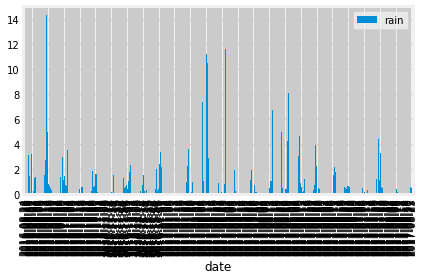

<Figure size 720x864 with 0 Axes>

In [23]:
# Plot the Results in a Matplotlib bar chart - makes no sense to me
# first attempt to graph non-grouped precipitation totals
precip_totals_ngb_df.set_index('date', inplace=True)
precip_totals_df.plot.bar()
plt.tight_layout()
plt.figure(figsize=(10,12))
plt.show()

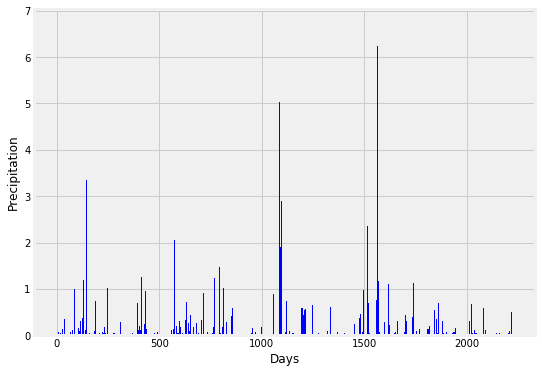

In [24]:
# Plot the Results in a Matplotlib bar chart - makes no sense to me
plt.figure(figsize=(8,6))
x_axis = np.arange(len(precip_totals_ngb_df["precip"]))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, precip_totals_ngb_df["precip"], color="blue",align="edge")
#plt.xticks(tick_locations, precip_totals_df.index,rotation = "vertical")
plt.xlabel("Days")
plt.ylabel("Precipitation")
plt.show()

## Station Analysis

### Total Number of stations in data set

In [25]:
# the total number of weather stations
nmbr_stations = session.query(Measurement).group_by(Measurement.station).count()
print("There are {} weather stations.".format(nmbr_stations))

There are 9 weather stations.


### The most active stations, sorted by highest cumulative tobs

In [26]:
# most active stations
sel_2 = [Measurement.station,
      func.sum(Measurement.tobs)]

most_active = session.query(*sel_2).\
filter(Measurement.date > '2016-08-23').\
group_by(Measurement.station).\
order_by(func.sum(Measurement.tobs).desc()).all()
most_active

[('USC00519397', 27070.0),
 ('USC00519523', 25859.0),
 ('USC00519281', 25657.0),
 ('USC00516128', 25086.0),
 ('USC00513117', 25058.0),
 ('USC00514830', 23454.0),
 ('USC00517948', 13605.0)]

In [27]:
# most active stations - approach 2 - the same answer....
sel_2 = [Measurement.station,
      func.count(Measurement.station)]

most_active = session.query(*sel_2).\
filter(Measurement.date > '2016-08-23').\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
most_active

[('USC00519397', 360),
 ('USC00519281', 351),
 ('USC00516128', 348),
 ('USC00513117', 342),
 ('USC00519523', 336),
 ('USC00514830', 304),
 ('USC00517948', 182)]

## Temperature Observation Data - Highest Activity Station

In [28]:
# query to sum all temperature observation data for the last year, groupby on weather station
sel_4 = [Measurement.station,
      func.sum(Measurement.tobs)]

observation_totals = session.query(*sel_4).\
filter(Measurement.date > '2016-08-23').\
group_by(Measurement.station).\
order_by(func.sum(Measurement.tobs).desc()).all()
observation_totals

[('USC00519397', 27070.0),
 ('USC00519523', 25859.0),
 ('USC00519281', 25657.0),
 ('USC00516128', 25086.0),
 ('USC00513117', 25058.0),
 ('USC00514830', 23454.0),
 ('USC00517948', 13605.0)]

In [29]:
# Stations with the highest number of rows in the data set
sel_station = [Measurement.station,
      func.count(Measurement.station)]

station_rows = session.query(*sel_station).\
filter(Measurement.date > '2016-08-23').\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
station_rows

[('USC00519397', 360),
 ('USC00519281', 351),
 ('USC00516128', 348),
 ('USC00513117', 342),
 ('USC00519523', 336),
 ('USC00514830', 304),
 ('USC00517948', 182)]

### Highest activity station based on number of rows, sorted descending

In [30]:
# Stations with the highest number of rows in the data set
sel_station = [Measurement.station,
      func.count(Measurement.station)]

station_rows = session.query(*sel_station).\
filter(Measurement.date > '2016-08-23').\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
station_rows

[('USC00519397', 360),
 ('USC00519281', 351),
 ('USC00516128', 348),
 ('USC00513117', 342),
 ('USC00519523', 336),
 ('USC00514830', 304),
 ('USC00517948', 182)]

### Highest Activity Station Statistics

In [31]:
# statistics, Station with highest number of observations: max temp, minimum temp & average temp.
sel_highest = [Measurement.station,
      func.max(Measurement.tobs),
        func.min(Measurement.tobs),
        func.avg(Measurement.tobs)]

highest_station_stats = session.query(*sel_highest).\
filter(Measurement.station == 'USC00519397').\
filter(Measurement.date > '2016-08-23').all()

highest_station_stats

[('USC00519397', 87.0, 60.0, 75.19444444444444)]

In [32]:
# query to sum all rainfall by date for the last year, grouped by tobs
sel_5 = [Measurement.tobs, 
            func.count(Measurement.tobs)]

tobs_freq = session.query(*sel_5).\
filter(Measurement.date > '2016-08-23').\
group_by(Measurement.tobs).\
order_by(Measurement.tobs).all()
tobs_freq

[(58.0, 1),
 (59.0, 3),
 (60.0, 6),
 (61.0, 4),
 (62.0, 13),
 (63.0, 15),
 (64.0, 23),
 (65.0, 28),
 (66.0, 31),
 (67.0, 54),
 (68.0, 56),
 (69.0, 92),
 (70.0, 110),
 (71.0, 121),
 (72.0, 125),
 (73.0, 117),
 (74.0, 173),
 (75.0, 171),
 (76.0, 209),
 (77.0, 211),
 (78.0, 198),
 (79.0, 158),
 (80.0, 153),
 (81.0, 88),
 (82.0, 42),
 (83.0, 12),
 (84.0, 6),
 (85.0, 1),
 (87.0, 2)]

In [33]:
# tobs groupby data frame
tobs_freq_df = pd.DataFrame(columns=['tobs_category','tobs_freq'], data=tobs_freq)
tobs_freq_df.head()

,tobs_category,tobs_freq
0,58.0,1
1,59.0,3
2,60.0,6
3,61.0,4
4,62.0,13


## As per Gerrit's recommendation, skip the group_by for the histogram, just work off the last year of temperature observations 

In [34]:
# filter Measurement based on lat year of data
sel_tobs = [Measurement.date,
      Measurement.tobs]

tobs_freq = session.query(*sel_tobs).\
filter(Measurement.date > '2016-08-23').\
filter(Measurement.station == 'USC00519397').\
order_by(Measurement.date).all()
tobs_freq

[('2016-08-24', 79.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 79.0),
 ('2016-08-27', 77.0),
 ('2016-08-28', 78.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 79.0),
 ('2016-08-31', 80.0),
 ('2016-09-01', 81.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 79.0),
 ('2016-09-04', 75.0),
 ('2016-09-05', 79.0),
 ('2016-09-06', 76.0),
 ('2016-09-07', 76.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 78.0),
 ('2016-09-11', 76.0),
 ('2016-09-12', 78.0),
 ('2016-09-13', 78.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 80.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 81.0),
 ('2016-09-19', 77.0),
 ('2016-09-20', 77.0),
 ('2016-09-21', 78.0),
 ('2016-09-22', 76.0),
 ('2016-09-23', 82.0),
 ('2016-09-24', 81.0),
 ('2016-09-25', 78.0),
 ('2016-09-26', 80.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 79.0),
 ('2016-09-29', 80.0),
 ('2016-09-30', 80.0),
 ('2016-10-01', 80.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 80.0),
 ('2016-10-

In [35]:
# convert into data frame
tobs_freq_df = pd.DataFrame(columns=['date','tobs'], data=tobs_freq)
tobs_freq_df.head()

,date,tobs
0,2016-08-24,79.0
1,2016-08-25,80.0
2,2016-08-26,79.0
3,2016-08-27,77.0
4,2016-08-28,78.0


Text(0.5, 1.0, 'Tobs Frequency for Station USC00519397')

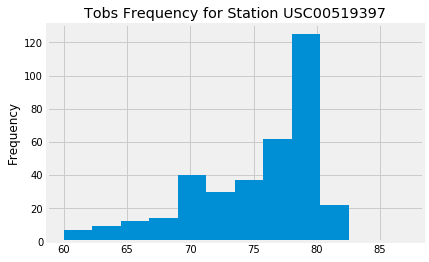

In [36]:
# second attempt to make histogram this time based on tobs only
tobs_freq_df = pd.DataFrame(columns=['tobs'], data=tobs_freq_df)
tobs_freq_df.hist(bins=12)
plt.ylabel("Frequency")
plt.title("Tobs Frequency for Station USC00519397")

In [37]:
# List all Station names:
station_names = session.query(Station.station, Station.name).all()
station_names

[('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 'KANEOHE 838.1, HI US'),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00517948', 'PEARL CITY, HI US'),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00519281', 'WAIHEE 837.5, HI US'),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US')]

In [39]:
# view Station tables data
# View measurement table
station_data = pd.read_sql("SELECT * FROM station", engine)
station_data.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [43]:
# Join the measurement file to the station file
combined_temp = pd.merge(measure_data, station_data, on="station", how="left")
combined_temp.head()

,id_x,station,date,prcp,tobs,id_y,name,latitude,longitude,elevation
0,1,USC00519397,2010-01-01,0.08,65.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00519397,2010-01-02,0.00,63.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,3,USC00519397,2010-01-03,0.00,74.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,4,USC00519397,2010-01-04,0.00,76.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,5,USC00519397,2010-01-06,NaN,73.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


![precipitation](Images/precipitation.png)

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
